In [1]:
import pandas as pd
import numpy as np
from os import listdir
from datetime import datetime
import zarr
from matplotlib import pyplot as plt

In [2]:
zarrds = zarr.open_group('C:/Users/HELI/data/zarr3/MSFT.zarr')

# NUMERO DE DIAS EN EL ZARR (NECESARIO PARA PONDERAR EL NÚMERO DE BARRAS (tick y volume) PROMEDIO)
num_days = len(zarrds.date)

print('número de días en el zarr:',num_days)

número de días en el zarr: 558


In [9]:
average_ticks_day, average_volume_day, average_dollar_day = 0, 0, 0

for i in range(0,num_days):
    value = zarrds.value[i]
    value = value[value>0]
    average_ticks_day  += len(value)/num_days

    vol = zarrds.vol[i]
    vol = vol[vol>0]
    average_volume_day += sum(vol)/num_days
    
    fec = zarrds.date[i]
    dol = get_arrs(zarrds,fec)
    average_dollar_day += dol/num_days

KeyboardInterrupt: 

In [11]:
x = range(558)
arrs = [tick,vols,dols]
colors  = ['r','g','b']
labels = ['Tick Bars','Volume Bars','Dollar Bars']

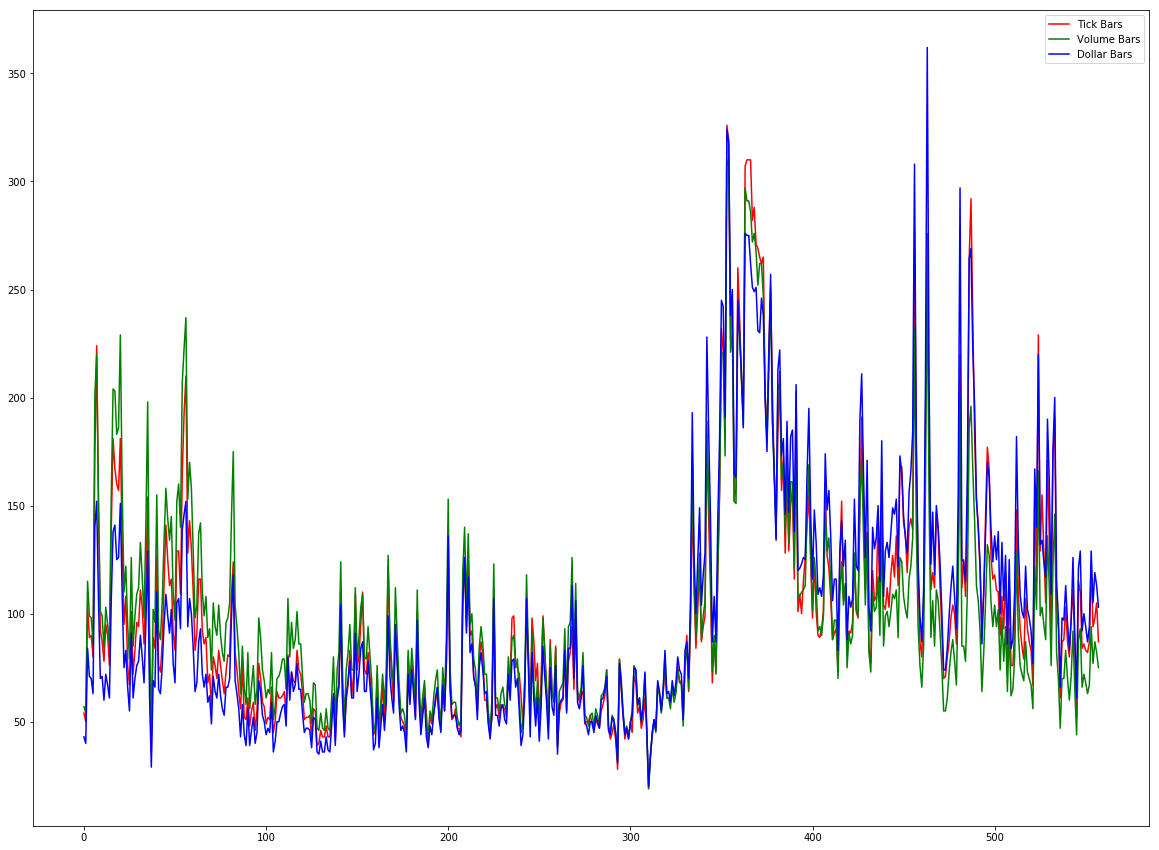

In [16]:
plt.figure(figsize=(20,15))
for i,c,l in zip(arrs,colors,labels):
    plt.plot(x,i,c,label='l')
    plt.legend(labels)
plt.savefig('C:/Users/HELI/Desktop/ga')
plt.show()

In [10]:
tick = []
vols = []
dols = []
for i in range(0,num_days):
    value = zarrds.value[i]
    value = value[value>0]
    tick.append(len(value)//dato[0])

    vol = zarrds.vol[i]
    vol = vol[vol>0]
    vols.append(sum(vol)//dato[1])
    
    
    fec = zarrds.date[i]
    dol = get_arrs(zarrds,fec)
    dols.append(dol//dato[2])

In [19]:
average_ticks_day = int(average_ticks_day)
average_volume_day = int(average_volume_day)
average_dollar_day = int(average_dollar_day)

print('average_ticks_day =',average_ticks_day)
print('average_volume_day =',average_volume_day)
print('average_dollar_day =',average_dollar_day)

average_ticks_day = 256449
average_volume_day = 25848462
average_dollar_day = 4006673708


In [4]:
def get_arrs(zarrds,date_):
    arr = np.array(zarrds.date)
    idx = np.where(arr == date_)[0][0]
    prices =  zarrds.value[idx]
    prices = prices[prices>0]
    volume = zarrds.vol[idx]
    volume = volume[:len(prices)]
    
    pv = sum(prices * volume)
    
    return pv

In [5]:
def bar_para(dato,num_bar):
    '''
    dato    := array con el número de ticks, volume y dollar promedio por día
    num_bar := el número de barras que queremos obtener en promedio
    '''
    bar_para = dato/num_bar
    
    bar_para = bar_para.astype(int)
    
    dic = {'tick_para': bar_para[0], 'vol_para': bar_para[1], 'dol_para':bar_para[2]}
    # bar_para := retorna un array con el número de ticks, volume y dollar para formar las barras
    return dic 

In [6]:
url = 'C:/Users/HELI/data/zarr3/'
ticker = 'MSFT'

In [27]:
dato/num_days


array([4.59586022e+02, 4.63234086e+04, 7.18041883e+06])

In [7]:
dato = np.array([average_ticks_day, average_volume_day, average_dollar_day])
print(bar_para(dato,100))

{'tick_para': 2, 'vol_para': 268, 'dol_para': 0}


# FUNCION FINAL QUE AGRUPA TODO

INPUTS:
* url     : ubicacion donde se encuentra el archivo zarr (ejemplo: 'F:/DESCARGAS_2021/')
* ticker  : ticker de la acción (ejemplo: 'MSFT')
* num_bar : el número de barras promedio por día

OUTPUT:
* diccionario con hyperparametros para las tres barras estandar
## {'tick_para': a, 'vol_para': b, 'dol_para': c}

DEPENDENCIAS:
* numpy
* zarr
* get_arrs(zarrds,date_)
* bar_para(dato,num_bar)

In [23]:
import pandas as pd
import numpy as np
import zarr

def standard_bar_tunning(url,ticker,num_bar):
    '''
    INPUTS:
    * url     : ubicacion donde se encuentra el archivo zarr (ejemplo: 'F:/DESCARGAS_2021/')
    * ticker  : ticker de la acción (ejemplo: MSFT)
    * num_bar : el número de barras promedio por día

    OUTPUT:
    * diccionario con hyperparametros para las tres barras estandar
    ## {'tick_para': a, 'vol_para': b, 'dol_para': c}
    '''
    #####################################################################################################################
    # PASO 1: INSUMOS 
    #####################################################################################################################
    url = url+ticker+'.zarr'
    
    ## 1) Abro el zarr sin subir la información (más rápido)
    zarrds = zarr.open_group(url)
    
    ## 2) Guardo el número de días en el ZARR (NECESARIO PARA PONDERAR EL NÚMERO DE BARRAS (tick y volume) PROMEDIO)
    num_days = len(zarrds.date)
    
    ## 3) Guardo el número promedio diario de ticks, activos transados (volume) y dinero transado (dollar)  
    average_ticks_day, average_volume_day, average_dollar_day = 0, 0, 0

    for i in range(0,num_days):
        value = zarrds.value[i]
        value = value[value>0]
        average_ticks_day  += len(value)/num_days

        vol = zarrds.vol[i]
        vol = vol[vol>0]
        average_volume_day += sum(vol)/num_days

        fec = zarrds.date[i]
        dol = get_arrs(zarrds,fec)
        average_dollar_day += dol/num_days    
    
    ## 3.5) Transformo a enteros los valores calculados en el paso 3 y los guardo en un array llamado ***dato***
    average_ticks_day = int(average_ticks_day)
    average_volume_day = int(average_volume_day)
    average_dollar_day = int(average_dollar_day)
    
    dato = np.array([average_ticks_day, average_volume_day, average_dollar_day])

    #####################################################################################################################
    # PASO 2: PRODUCTO 
    #####################################################################################################################

    ## 4) calibro los hyperparametros y los guardo en un diccionario ***dic*** (en este paso uso el INSUMO ***num_bar***)
    dic = bar_para(dato,num_bar)
    
    ## 5) retorno el diccionario ***dic***
    return dic

In [24]:
##### PRUEBA

dic = standard_bar_tunning(url,ticker,num_bar)

dic

NameError: name 'num_bar' is not defined

In [28]:
dato = {'tick_para': 2564, 'vol_para': 258484, 'dol_para': 40066737}

In [8]:
dato = [2564,258484,40066737]